In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("NewestDataset.csv").dropna()
data["profit_cat"] = data["profit"].apply(lambda x: "pos" if x > 0 else "neg")
data_call = data[data["call_put"] == "Call"]
# data_put = data[data["call_put"] == "Put"]

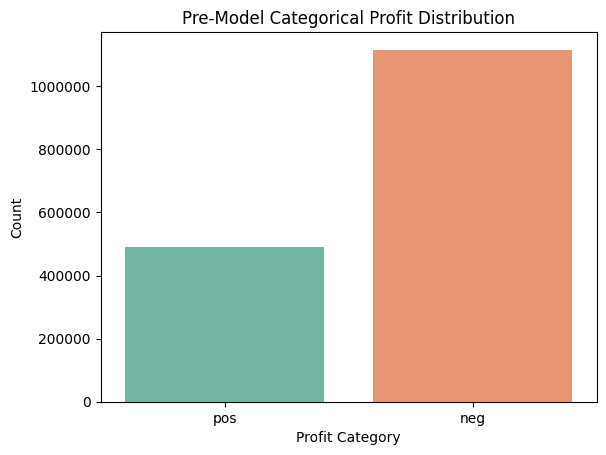

In [11]:
sns.countplot(x="profit_cat", data=data_call, palette="Set2")
plt.title("Pre-Model Categorical Profit Distribution")
plt.xlabel("Profit Category")
plt.ylabel("Count")
plt.ticklabel_format(style="plain", axis='y')
plt.show()

In [15]:
print(f"min profit: {data["profit"].min()}")
print(f"max profit: {data["profit"].max()}")
print(f"mean profit: {data["profit"].mean()}")
print(f"median profit: {data["profit"].median()}")

min profit: -1930.500503540039
max profit: 1390.5565017700196
mean profit: -10.850039973030011
median profit: -4.299998474121091


In [ ]:
# complete number of entries after na were dropped
data_tot = data.shape[0]
# chosen range of -100 to 100 for profit
profit = data[(data["profit"] > -100) & (data["profit"] < 100)]
# seeing how many entries were left
profit_loss_out = data[data["profit"] <= -100]["profit"].count()
profit_gain_out = data[data["profit"] >= 100]["profit"].count()
profit_tot = profit.shape[0]
print(f"total entries: {data_tot}")
print(f"total entries in range -100 to 100: {profit_tot}")
print(f"total entries out of range -100 to 100: {profit_loss_out + profit_gain_out}")
print(f"percentage of outliers to total: {(profit_loss_out + profit_gain_out) / data_tot * 100:.2f}%")

pos_profit = data[data["profit"] > 0]["profit"].count()
neg_profit = data[data["profit"] < 0]["profit"].count()
print(f"percent positive profit: {pos_profit / profit_tot * 100:.2f}%")

# average profit * profitable % (.2337)
# average loss * (1 - profitable %)

total entries: 3345186
total entries in range -100 to 100: 3274554
total entries out of range -100 to 100: 70632
percentage of outliers to total: 2.11%


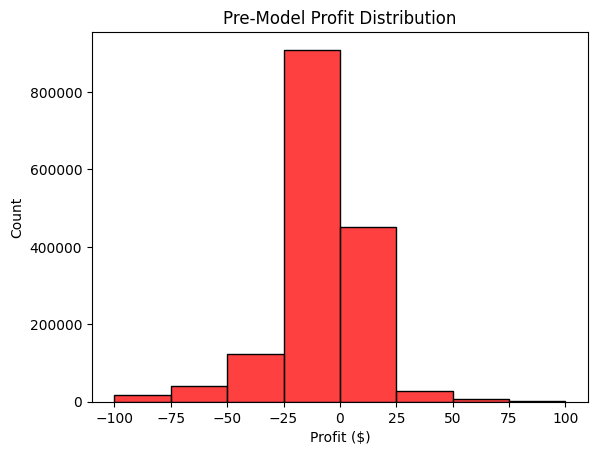

In [22]:
data_call = data_call[(data_call["profit"] > -100) & (data_call["profit"] < 100)]
# data_put = data_put[(data_put["profit"] > -100) & (data_put["profit"] < 100)]
profit_col = data_call["profit"]
sns.histplot(profit_col, bins=8, color="red")
plt.ticklabel_format(style=None, axis='y')
plt.title("Pre-Model Profit Distribution")
plt.xlabel("Profit ($)")
plt.show()


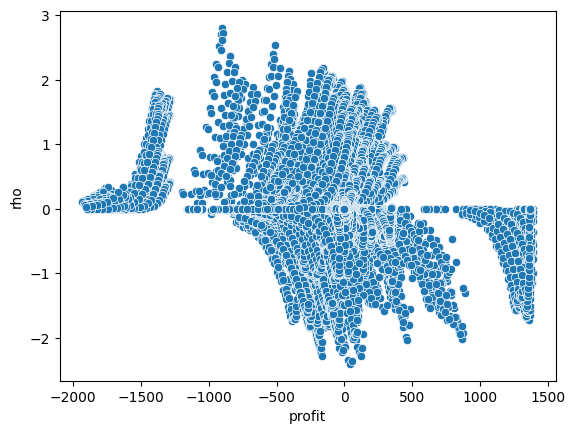

In [ ]:
# interesting graph of rho
sns.scatterplot(x="profit", y="rho", data=data)
plt.show()

23.37298878297522
(7519017, 26) (1757419, 26)


In [11]:
avg_profit = pos_profit["profit"].mean()
avg_loss = neg_profit["profit"].median()
print(avg_profit, avg_loss)
print(avg_profit *.2337)
print(avg_loss * (1 - .2337))

print(avg_profit * .5)
print(avg_loss * .5)

print((avg_profit * .2337 + avg_loss * (1-.2337))/2)
print((avg_profit * .5 + avg_loss * .5) / 2)

17.98624458694925 -7.940000915527344
4.2033853599700395
-6.084422701568603
8.993122293474626
-3.970000457763672
-0.9405186707992819
2.5115609178554767


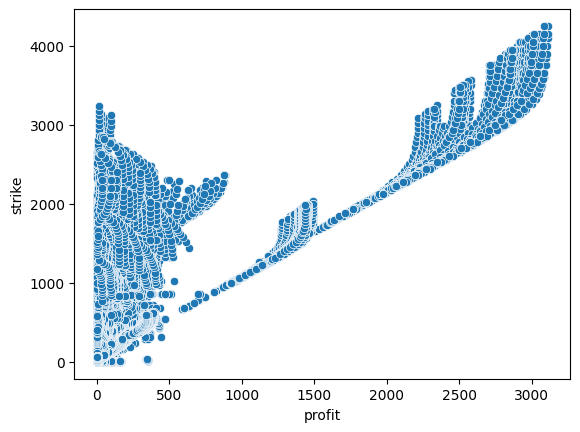

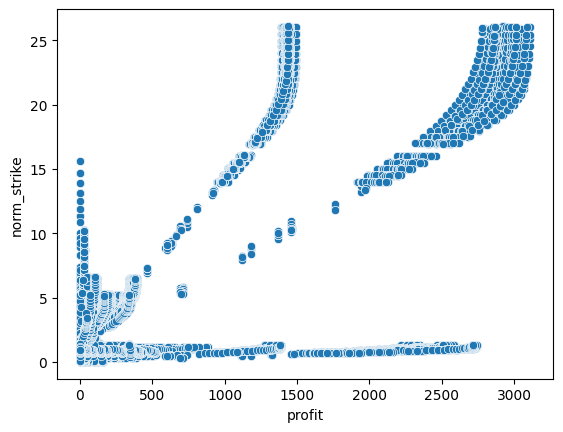

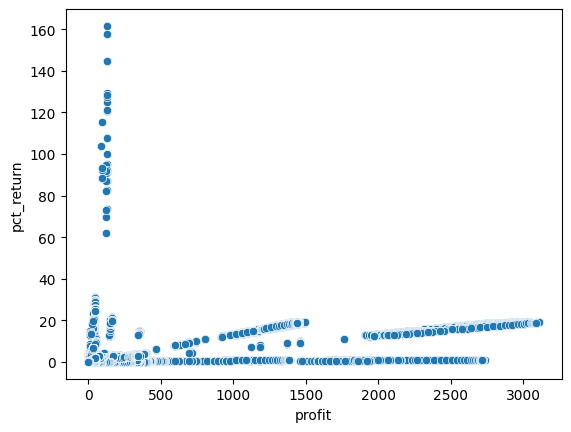

<Axes: xlabel='pct_return', ylabel='norm_strike'>

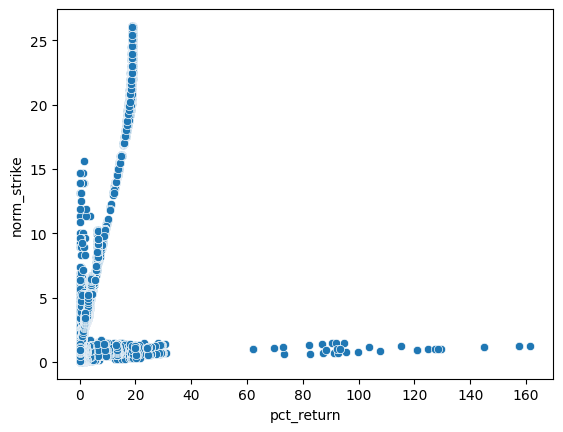

In [12]:
# graphs of strike price
pos_profit["norm_strike"] = pos_profit["strike"]/pos_profit["current_stock_price"]
pos_profit["pct_return"] = pos_profit["profit"]/pos_profit["current_stock_price"]
sns.scatterplot(x="profit", y="strike", data=pos_profit)
plt.show()
sns.scatterplot(x="profit", y="norm_strike", data=pos_profit)
plt.show()
sns.scatterplot(x="profit", y="pct_return", data=pos_profit)
plt.show()
sns.scatterplot(x="pct_return", y="norm_strike", data=pos_profit)

# Using Sentiment

In [ ]:
sent = pd.read_csv("cleaned_optData_with_prices_sentiment.csv")
print(sent.shape)
sent_copy = sent[(sent["avg_pos_score"].isna() == False) & (sent["avg_neg_score"].isna() == False)]
print(sent_copy.shape)

(112910, 26)
(61673, 26)
123346


In [18]:
sent

,date,act_symbol,expiration,strike,call_put,bid,ask,vol,delta,gamma,...,current_stock_price,stock_price_at_expiration,moneyness,position,opt_price,profit,stock_delta_60days,priceDelta,avg_pos_score,avg_neg_score
0,2020-01-04,A,2020-01-17,72.5,Call,11.75,12.90,0.2345,0.9997,0.0003,...,84.57,90.120003,17.620003,ITM,12.325,5.295003,NaN,-0.979310,NaN,NaN
1,2020-01-04,A,2020-01-17,72.5,Put,0.01,0.03,0.2421,-0.0005,0.0004,...,84.57,90.120003,-17.620003,OTM,0.020,-17.640003,NaN,-603.499985,NaN,NaN
2,2020-01-04,A,2020-01-17,75.0,Call,8.05,10.20,0.2345,0.9960,0.0030,...,84.57,90.120003,15.120003,ITM,9.125,5.995003,NaN,-1.048767,NaN,NaN
3,2020-01-04,A,2020-01-17,75.0,Put,0.01,0.10,0.2421,-0.0051,0.0036,...,84.57,90.120003,-15.120003,OTM,0.055,-15.175003,NaN,-173.999994,NaN,NaN
4,2020-01-04,A,2020-01-17,77.5,Call,7.05,7.55,0.2345,0.9738,0.0157,...,84.57,90.120003,12.620003,ITM,7.300,5.320003,NaN,-0.968493,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112905,2020-01-08,LNC,2020-01-17,57.5,Call,1.57,1.70,0.2627,0.6911,0.1463,...,59.02,60.040001,2.540001,ITM,1.635,0.905001,-2.252402,-0.929664,NaN,NaN
112906,2020-01-08,LNC,2020-01-17,57.5,Put,0.45,0.54,0.2639,-0.3100,0.1460,...,59.02,60.040001,-2.540001,OTM,0.495,-3.035001,-2.252402,-3.070708,NaN,NaN
112907,2020-01-08,LNC,2020-01-17,60.0,Call,0.32,0.38,0.2324,0.2714,0.1556,...,59.02,60.040001,0.040001,ITM,0.350,-0.309999,-2.252402,2.799999,NaN,NaN
112908,2020-01-08,LNC,2020-01-17,60.0,Put,1.55,2.09,0.2683,-0.7008,0.1422,...,59.02,60.040001,-0.040001,OTM,1.820,-1.860001,-2.252402,0.538461,NaN,NaN


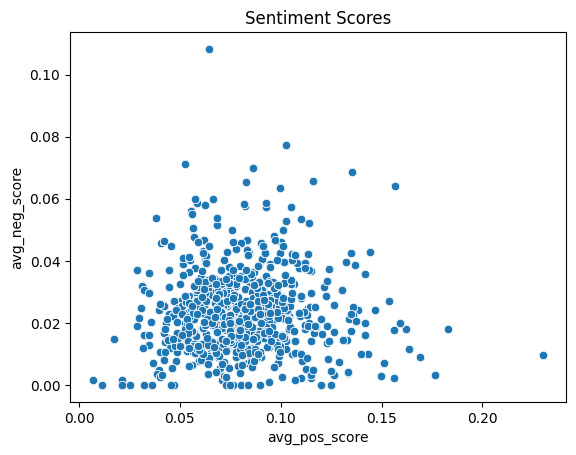

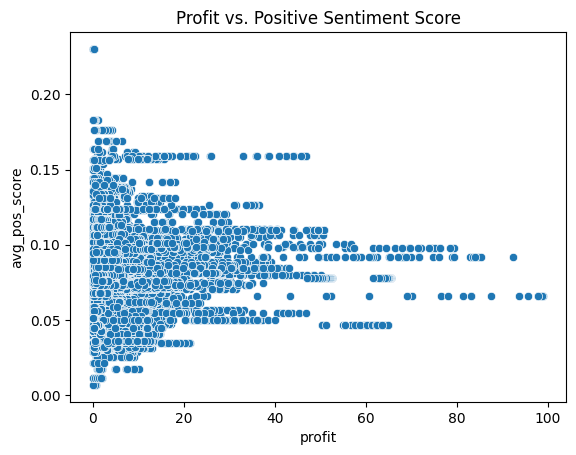

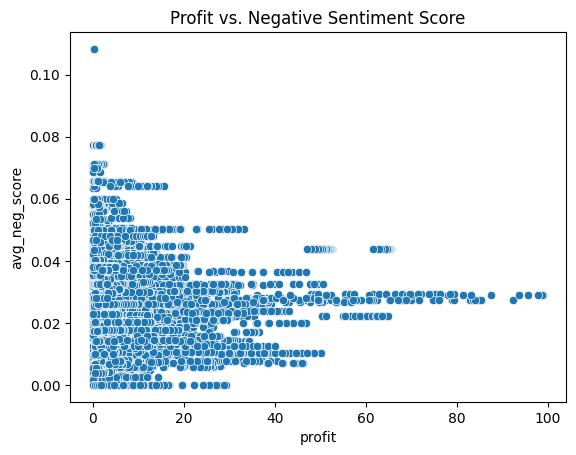

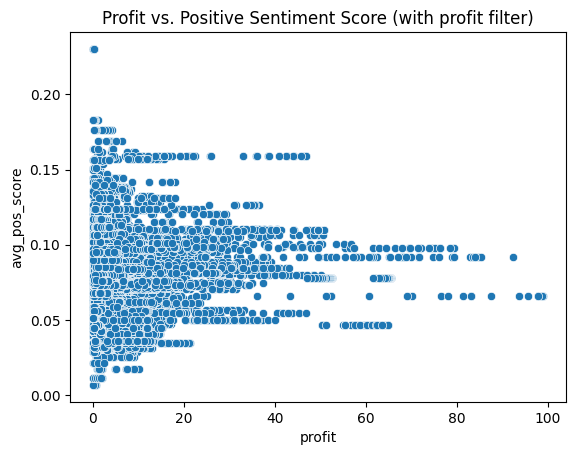

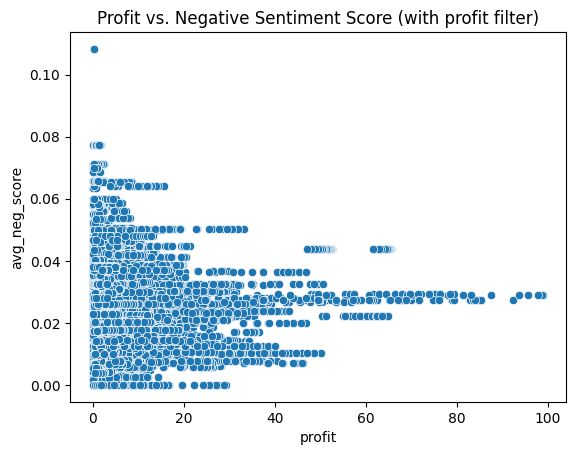

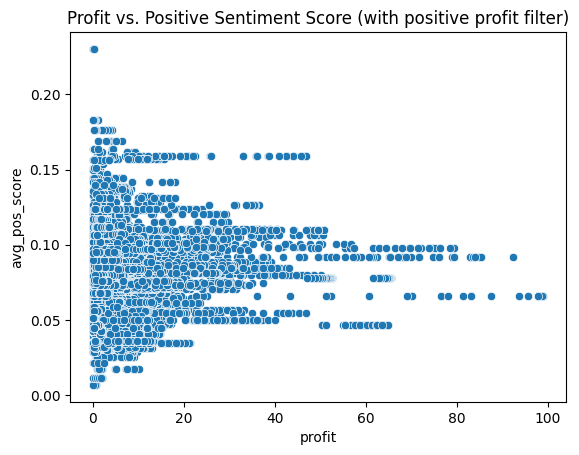

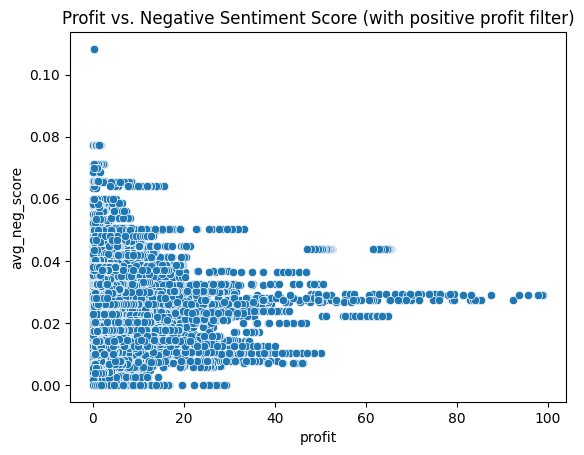

Text(0.5, 1.0, 'Positive Sentiment Score Distribution')

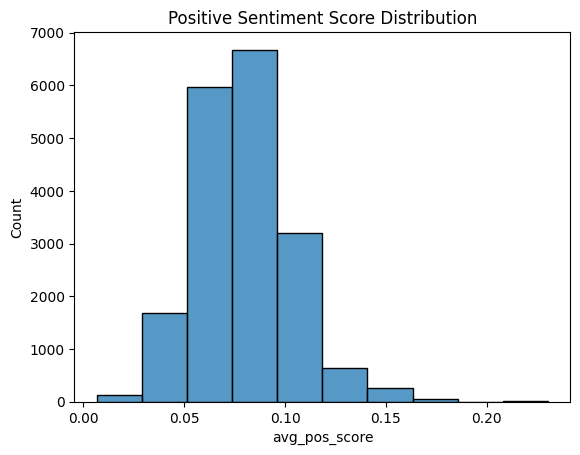

In [28]:
sns.scatterplot(x="avg_pos_score", y="avg_neg_score", data=sent_copy)
plt.title("Sentiment Scores")
plt.show()

sns.scatterplot(x="profit", y="avg_pos_score", data=sent_copy)
plt.title("Profit vs. Positive Sentiment Score")
plt.show()

sns.scatterplot(x="profit", y="avg_neg_score", data=sent_copy)
plt.title("Profit vs. Negative Sentiment Score")
plt.show()

sent_copy = sent_copy[(sent_copy["profit"] > -100) & (sent_copy["profit"] < 100)]
sns.scatterplot(x="profit", y="avg_pos_score", data=sent_copy)
plt.title("Profit vs. Positive Sentiment Score (with profit filter)")
plt.show()

sns.scatterplot(x="profit", y="avg_neg_score", data=sent_copy)
plt.title("Profit vs. Negative Sentiment Score (with profit filter)")
plt.show()

sent_copy = sent_copy[(sent_copy["profit"] > 0) & (sent_copy["profit"] < 100)]
sns.scatterplot(x="profit", y="avg_pos_score", data=sent_copy)
plt.title("Profit vs. Positive Sentiment Score (with positive profit filter)")
plt.show()

sns.scatterplot(x="profit", y="avg_neg_score", data=sent_copy)
plt.title("Profit vs. Negative Sentiment Score (with positive profit filter)")
plt.show()

sns.histplot(x="avg_pos_score", data=sent_copy, bins=10)
plt.title("Positive Sentiment Score Distribution")

In [29]:
sent_copy

,date,act_symbol,expiration,strike,call_put,bid,ask,vol,delta,gamma,...,current_stock_price,stock_price_at_expiration,moneyness,position,opt_price,profit,stock_delta_60days,priceDelta,avg_pos_score,avg_neg_score
40,2020-01-04,AAL,2020-01-17,23.5,Call,4.10,4.30,0.4664,0.9667,0.0294,...,27.650000,28.400000,4.900000,ITM,4.200,0.700000,NaN,-0.988095,0.073535,0.042773
42,2020-01-04,AAL,2020-01-17,25.0,Call,2.74,2.85,0.4353,0.8912,0.0792,...,27.650000,28.400000,3.400000,ITM,2.795,0.605000,NaN,-0.948122,0.073535,0.042773
44,2020-01-04,AAL,2020-01-17,25.5,Call,2.28,2.40,0.4108,0.8543,0.1028,...,27.650000,28.400000,2.900000,ITM,2.340,0.560000,NaN,-0.918803,0.073535,0.042773
46,2020-01-04,AAL,2020-01-17,26.5,Call,1.50,1.53,0.3781,0.7324,0.1608,...,27.650000,28.400000,1.900000,ITM,1.515,0.385000,NaN,-0.759076,0.073535,0.042773
48,2020-01-04,AAL,2020-01-17,27.0,Call,1.15,1.18,0.3686,0.6462,0.1864,...,27.650000,28.400000,1.400000,ITM,1.165,0.235000,NaN,-0.557940,0.073535,0.042773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112483,2020-01-08,LHX,2020-02-21,180.0,Call,31.20,32.90,0.2438,0.9768,0.0031,...,211.289993,222.800003,42.800003,ITM,32.050,10.750003,7.790016,-0.976287,0.083600,0.041943
112485,2020-01-08,LHX,2020-02-21,190.0,Call,20.40,24.40,0.2438,0.9097,0.0092,...,211.289993,222.800003,32.800003,ITM,22.400,10.400003,7.790016,-0.950446,0.083600,0.041943
112487,2020-01-08,LHX,2020-02-21,195.0,Call,17.50,18.80,0.2438,0.8479,0.0134,...,211.289993,222.800003,27.800003,ITM,18.150,9.650003,7.790016,-0.897520,0.083600,0.041943
112489,2020-01-08,LHX,2020-02-21,200.0,Call,13.50,14.30,0.2283,0.7785,0.0180,...,211.289993,222.800003,22.800003,ITM,13.900,8.900003,7.790016,-0.812230,0.083600,0.041943


In [31]:
grouped = sent_copy.groupby("act_symbol")[["avg_pos_score", "avg_neg_score", "profit"]].mean().reset_index()
grouped

,act_symbol,avg_pos_score,avg_neg_score,profit
0,AAL,0.073535,0.042773,0.427727
1,AAN,0.064190,0.023286,6.909772
2,AAP,0.072821,0.030357,7.392235
3,AAT,0.092714,0.058571,0.561876
4,ABBV,0.099633,0.023825,3.857728
...,...,...,...,...
729,YELP,0.060314,0.023371,1.179839
730,ZBH,0.077857,0.016429,3.826390
731,ZBRA,0.082238,0.016738,7.671763
732,ZION,0.043347,0.019857,3.006562


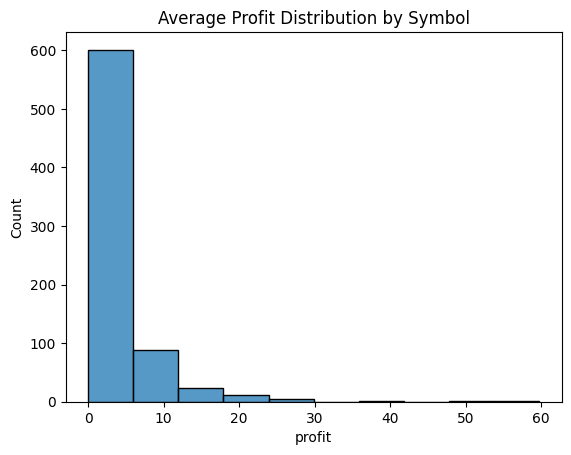

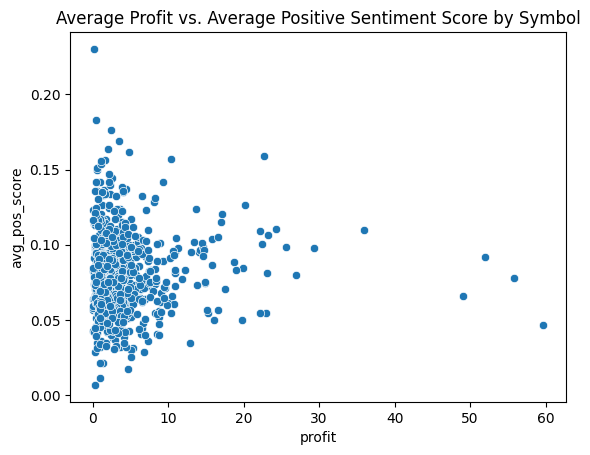

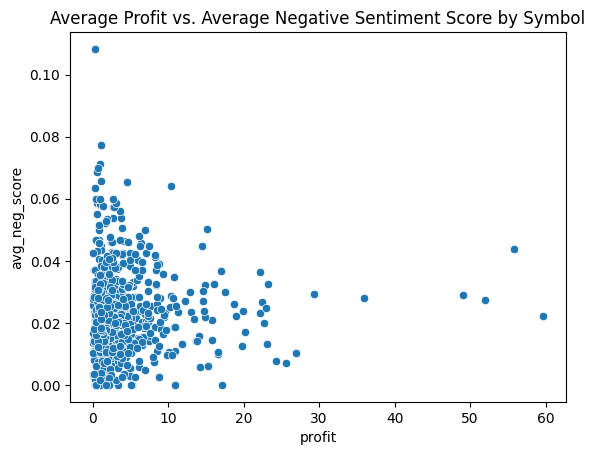

In [34]:
sns.histplot(x="profit", data=grouped, bins=10)
plt.title("Average Profit Distribution by Symbol")
plt.show()

sns.scatterplot(x="profit", y="avg_pos_score", data=grouped)
plt.title("Average Profit vs. Average Positive Sentiment Score by Symbol")
plt.show()

sns.scatterplot(x="profit", y="avg_neg_score", data=grouped)
plt.title("Average Profit vs. Average Negative Sentiment Score by Symbol")
plt.show()

histogram of deltas, then look at delta with calls vs. puts
try heat maps of something, find other interesting graphs

also look at the different outliers and what can be seen from them

run third pipeline on i think the dataset before sentiment